<a href="https://colab.research.google.com/github/rafaelnber1234/Classification-of-Iris-Data-using-Machine-learning-methods-in-Python/blob/master/M5_M%C3%A9tricas_de_evaluaci%C3%B3n_para_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/HarryVargas96/Wine-quality/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

Este taller guiado tiene como objetivo mostrar la implementación del algoritmo Redenes Neuronales de Machine Learning usando scikitlearn. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* Entrenar y evaluar un modelo de clasificación creado con una Red Neuronal Artifical (RNA) - Percepectrón Multicapa


## **1. Importar librería sklearn**

In [1]:
!pip install -U scikit-learn

In [2]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.12
NumPy 1.21.5
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 1.0.2

## **2. Cargar datos**

In [3]:
from sklearn.datasets import make_classification

X,y = make_classification (n_samples=10000, n_features=4, n_classes=2, random_state= 0,shift=14, scale = 40)

In [ ]:
print(X.shape)
print(y.shape)

(10000, 4)
(10000,)


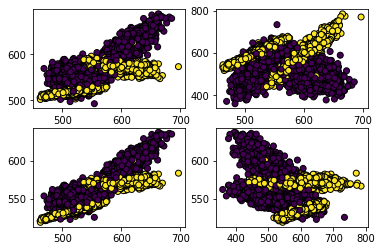

In [ ]:
fig, axes = plt.subplots(2,2)


axes[0,0].scatter(X[:,0], X[:,1],marker="o",c=y,edgecolors="k")
axes[0,1].scatter(X[:,0], X[:,2],marker="o",c=y,edgecolors="k")
axes[1,0].scatter(X[:,0], X[:,3],marker="o",c=y,edgecolors="k")
axes[1,1].scatter(X[:,2], X[:,3],marker="o",c=y,edgecolors="k")
plt.show()

## **3. Exploración**

In [4]:
pd.DataFrame(X).describe() # Resumen estadístico de las variables numéricas, note que a partir de x,y y z se calcula el porcentaje depth

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,559.714252,559.981665,559.534219,559.955155
std,45.218317,34.497212,59.212988,22.230776
min,462.655415,492.624343,359.377165,518.381176
25%,519.481289,525.847695,517.086683,539.361258
50%,551.195134,561.759414,564.323968,560.002317
75%,599.907139,578.130891,602.415356,573.733996
max,696.876348,688.281978,785.504035,638.031689


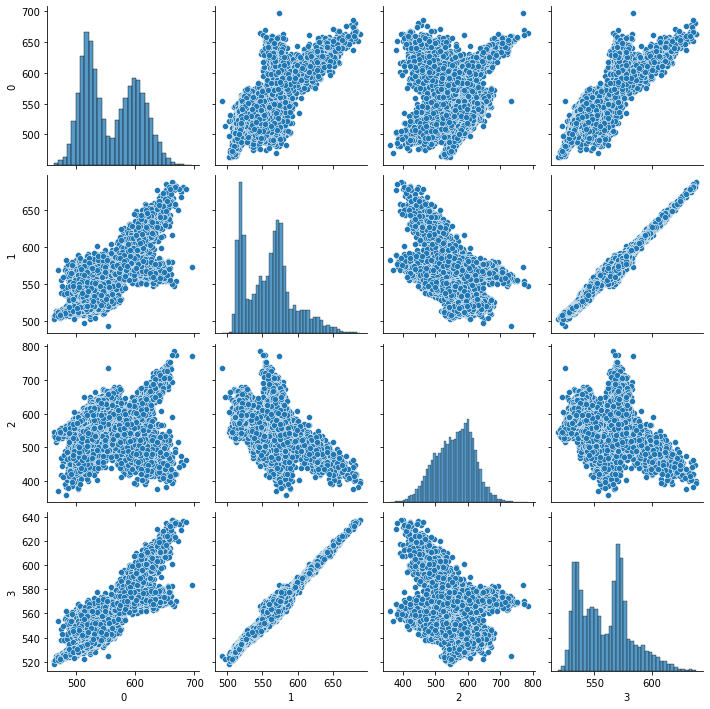

In [5]:
sb.pairplot(data = pd.DataFrame(X)) 

## **4. Transformación de variables**

Para este dataset de juguete no tenemos ninguna variable predictora categórica. Entonces lo que haremos es hacer escalado de las variables numéricas para crear ``X_scale``

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
X_scale = sc.fit_transform(X)


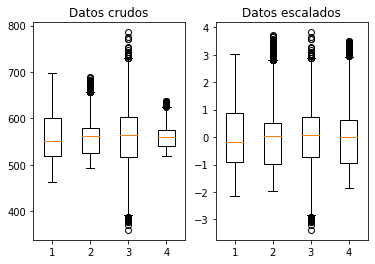

In [7]:
fig, axes = plt.subplots(1,2)

axes[0].boxplot(X)
axes[0].set_title('Datos crudos')
axes[1].boxplot(X_scale)
axes[1].set_title('Datos escalados')

plt.show();

## **5. Partición del dataset en entrenamiento y prueba**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scale,y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30% 
    random_state = 4  # Semilla aleatoria que sirve para reproducibilidad
)


In [9]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (7000, 4)
Dimensiones de y de entrenamiento: (7000,)

Dimensiones de X de prueba: (3000, 4)
Dimensiones de y de prueba: (3000,)


## **6. Modelamiento**

In [10]:
from sklearn.neural_network import MLPRegressor

In [12]:
from sklearn.neural_network import MLPClassifier #MultiLayerPerceptron
# También puede utilizar redes neuronales para resolver problemas de regesión
#from sklearn.neural_network import MLPRegressor

mlp = MLPClassifier(
        hidden_layer_sizes = (6,6,6), #3 capas ocultas
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000,
        random_state = 40
)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=1000, random_state=40)

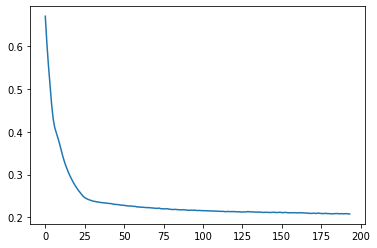

In [13]:
x = mlp.loss_curve_

plt.plot(x)

## **7. Evaluación del desempeño del modelo**

In [19]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
y_predict_test = mlp.predict(X_test)

y_predict_train = mlp.predict(X_train)

In [21]:
y_predict_test.shape

(3000,)

In [22]:
mlp.predict([[800,900,755,1000]])

array([0])

### **Matriz de confusión**

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict_test)

array([[1297,  181],
       [  88, 1434]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


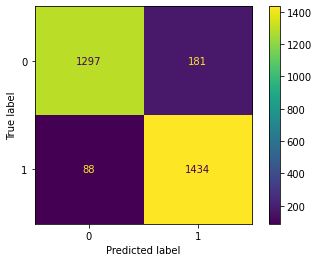

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp,X_test,y_test);

### **Exactitud**

In [25]:
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_predict_test)
print('Exactitud en partición de prueba: {:3f}'.format(acc_test))

acc_train = accuracy_score(y_train, y_predict_train)
print('Exactitud en partición de entrenamiento: {:3f}'.format(acc_train))

Exactitud en partición de prueba: 0.910333
Exactitud en partición de entrenamiento: 0.915286


### **Recall**

In [26]:
from sklearn.metrics import recall_score

rec_test = recall_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(rec_test))

rec_train = recall_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(rec_train))

Recall en partición de prueba: 0.942181
Recall en partición de entrenamiento: 0.951793


### **Precisión**

In [27]:
from sklearn.metrics import precision_score

prec_test = precision_score(y_test, y_predict_test)
print('Recall en partición de prueba: {:3f}'.format(prec_test))

prec_train = precision_score(y_train, y_predict_train)
print('Recall en partición de entrenamiento: {:3f}'.format(prec_train))

Recall en partición de prueba: 0.887926
Recall en partición de entrenamiento: 0.886424


## **8. Busqueda de hiperparámetros**

Vamos a experimentar primero con los solver disponibles para entrenar el perceptrón multicapa. En este caso vamos a evaluar la exactitud, recuerde que según su interés le conviene usar una u otra métrica de evaluación.

In [28]:
 
accuracy = []
precision = []

for solver in ('lbfgs','sgd','adam'):

  mlp = MLPClassifier(
        hidden_layer_sizes = (6,6,6),
        activation = 'relu',
        solver = solver,
        max_iter = 10000, # Aumentamos las iteraciones para que los solver puedan converger
        random_state = 40
        )

  mlp.fit(X_train,y_train)
  y_pred = mlp.predict(X_test)

  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))

Para el uso de solver se puede apreciar que las diferencias tanto de exactitud y precisión son pequeñas. Una de las condiciones más importantes para usar uno u otro solver puede la cantidad de iteraciones necesarias para convergencia y así mismo el tiempo de convergencia.

Text(0, 0.5, 'Exactitud en prueba')

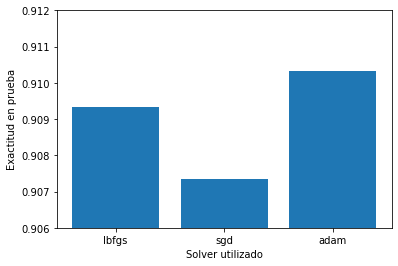

In [29]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,accuracy)
plt.ylim((0.906,0.912))
plt.xlabel('Solver utilizado')
plt.ylabel('Exactitud en prueba')

Text(0, 0.5, 'Precision en prueba')

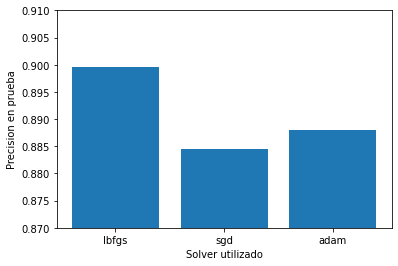

In [ ]:
solver =  ('lbfgs','sgd','adam')

plt.bar(solver,precision)
plt.ylim((0.87,0.91))
plt.xlabel('Solver utilizado')
plt.ylabel('Precision en prueba')

Ahora experimentemos con la cantidad de capas ocultas, en todos los casos vamos a dejar la misma cantidad de neuronas en cada capa.

In [30]:
accuracy = []
precision = []

for capas in ((6),(6,6),(6,6,6)):

  mlp = MLPClassifier(
        hidden_layer_sizes = capas,
        activation = 'relu',
        solver = 'adam',
        max_iter = 1000, 
        random_state = 40
        )

  mlp.fit(X_train,y_train)
  y_pred = mlp.predict(X_test)

  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))

Text(0, 0.5, 'Exactitud en prueba')

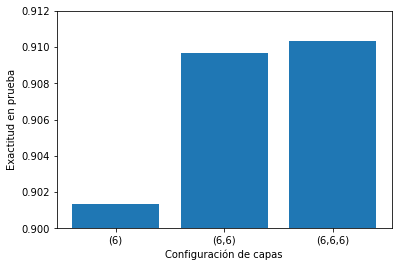

In [31]:
capas =  ('(6)','(6,6)','(6,6,6)')

plt.bar(capas,accuracy)
plt.ylim((0.90,0.912))
plt.xlabel('Configuración de capas')
plt.ylabel('Exactitud en prueba')

Text(0, 0.5, 'Precision en prueba')

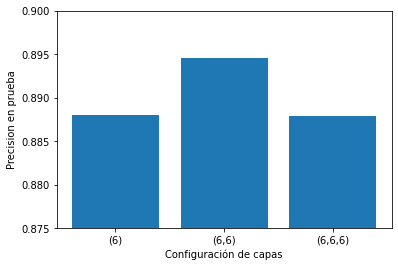

In [32]:
plt.bar(capas,precision)
plt.ylim((0.875,0.9))
plt.xlabel('Configuración de capas')
plt.ylabel('Precision en prueba')

Tenga presente que usted puede experimentar con la cantidad de capas ocultas (1 a 3 en el experimento anterior) como con la cantidad de neuronas en cada capa oculta.

Otros hiperparámetros interesantes para experimentar pueden ser las funciones de activación disponibles

```
activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
```

## **Recursos adicionales**

* Documentación

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html



